# Proyecto Machine Learning Forecasting
## XGBOOST
### Dataset Ictus

El objetivo de este proyecto es que a partir de datos clínicos **(5110 filas y 12 columnas)** en una RNA utilizando **XGBOOST** pronostique los sucesos por ictus y así podamos sacar las variables que nuestro modelo ha considerado importantes para pronosticar estos sucesos.
La finalidad es investigar estos parámetros/columnas de modo que sean de utilidad para futuros pacientes o para pacientes precoces para actuar de una forma más rapida o investigar estos supuestos.

link data : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### LIBRERIAS

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### PATH Y VISUALIZACIÓN DE DATOS

In [18]:
# PATH
path = "C:/Users/USUARIO/Desktop/Jupyter/DATA/"
data = pd.read_csv(path + "healthcare-dataset-stroke-data.csv")

In [19]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Preprocesado
Limpieza de datos nulos y columnas no dependientes del modelo.

In [20]:
print(data.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [21]:
data = data.dropna() # Quitamos valores con null , filas totales 4909

### Selección de datos
Separamos nuestros datos del dataframe en variables dependientes o independientes.
Almacenamos solamente en X las columnas que realmente tienen valores relevantes para nuestro algoritmo ya que por ejemplo la columna **STROKE** es una variable dependiente y la columna **id** no tiene peso estadístico en el pronóstico. Entonces tomamos los siguientes datos:

- La X, todas las columnas menos **ID y STROKE**. Siendo estos los valores independientes.
- La Y, con la columna de valores booleanos de **STROKE**. Siendo este el valor dependiente.

In [22]:
#PREPROCESADO
X = data.iloc[:, 1:-1] # quitamos id y el boleano de si ha tenido un ictus
Y = data.iloc[:, -1] # seleccionamos stroke

### Transformación de datos

En el dataframe existen variables tipo object de modo que las transformo con el metodo LabelEnconder(). Previamente recojo por la condiccion if el tipo object para que solo me seleccione las columnas que son tipo object. Asi el modelo podrá reconocer los objetos como números.

In [24]:
# Transformacion de las variables objetos a numericos
objeto = X.gender.dtypes
max = len(X.columns)
le = LabelEncoder()

In [26]:
# Codificamos los objetos para cada columna
for i in range(max):
    if ( X.iloc[:,i].dtypes == objeto):
        X.iloc[:, i] = le.fit_transform(X.iloc[:, i])

In [27]:
X.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2
7,0,69.0,0,0,0,2,1,94.39,22.8,2
9,0,78.0,0,0,1,2,1,58.57,24.2,0
10,0,81.0,1,0,1,2,0,80.43,29.7,2
11,0,61.0,0,1,1,0,0,120.46,36.8,3


### TRAIN Y TEST
Después de limpiar, preprocesar los datos, considerar que columnas son irrelavantes para nuestro modelo y transformar nuestros dato tipo texto a numérico ahora ya se pasaría a la fase de división de datos, es decir, considerar cuanto porcentaje de datos del dataset sería para entrenar nuestro modelo y el otro para testearlo y verificar su precisión. Normalmente:

- **TRAIN**, tiene el 80% de datos del dataset original ya que cuanto más datos más comprobaciones realizará y más fiable será.
- **TEST**, tiene el 20% de datos del dataset original y con él se mide la precisión.

Como sería un proceso muy laborioso hacerlo manualmente con está gran cantidad de datos hay una función en Python del modulo sklearn llamada **train_test_split** que nos facilita esta división de datos.

In [28]:
# Dividimos los datos usando la funcion train_test_split para Train Y test del modelo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### XGBOOST
XGBoost es una biblioteca de aumento de gradiente distribuida optimizada diseñada para ser altamente eficiente , flexible y portátil . Implementa algoritmos de aprendizaje automático bajo el marco Gradient Boosting . XGBoost proporciona un impulso de árbol paralelo (también conocido como GBDT, GBM) que resuelve muchos problemas de ciencia de datos de una manera rápida y precisa

In [29]:
# Llamamos a la funcion XGBOOST y creamos un objeto. Ajustamos el modelo y lo entrenamos
XGBOOST = XGBClassifier()
XGBOOST.fit(X_train, y_train)

# Con el modelo entrenado, hacemos una prediccion de los datos del testing
y_pred = XGBOOST.predict(X_test)

### TESTING DEL MODELO ENTRENADO
Hacemos la matriz de confusion para evaluar los datos, se observa en ella que tenemos **935 personas acertadas** con nuestro pronóstico y **47 falsos positivos-negativos**  del test de datos de 982 personas. **Precisión 94%**

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[934   5]
 [ 42   1]]


In [36]:
print("PRECISIÓN : " + str(935/982*100))

PRECISIÓN : 95.21384928716904


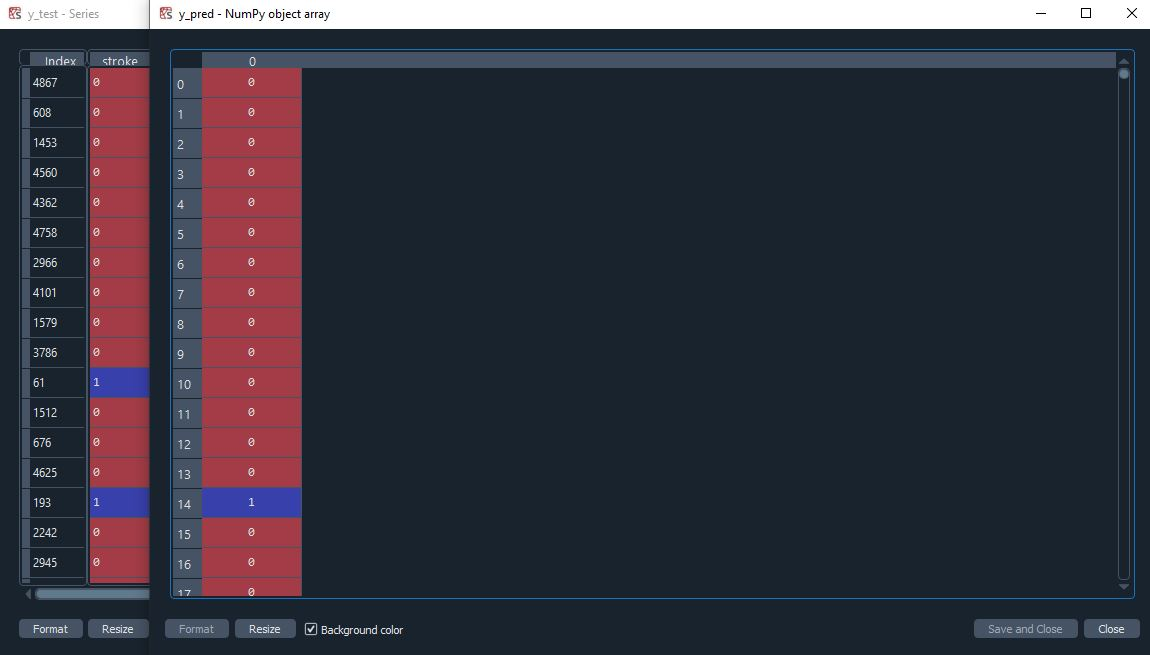

In [37]:
from IPython.display import Image
Image("C:/Users/USUARIO/Desktop/Jupyter/DATA/PrediccionFI.jpg")

### K-FOLD VALIDATION
Aplicamos el algoritmo de K-fold cross de validacion para medir la precisión de nuestro algoritmo
teniendo asi una mejor medida (validacion cruzada).
Como resultado obtengo una precisión óptima del modelo.

In [39]:
accuracies = cross_val_score(estimator = XGBOOST, X = X_train, y = y_train, cv = 10)
print("Precision: {:.2f} %".format(accuracies.mean()*100))
print("Desviacion estandar: {:.2f} %".format(accuracies.std()*100))

Precision: 94.65 %
Desviacion estandar: 0.47 %


### MODELO ENTRENADO
Como ya está el modelo entrenado y tengo una precisión óptima del **94%** ahora voy a sacar las columnas que el modelo de XGBOOST ha considerado importantes para pronosticar los casos clínicos del estudio de ictus.

In [40]:
# Vamos a ver que columnas le ha dado mas importancia para nuestro modelo
colummnas_importancia = XGBOOST.feature_importances_
columnasnombres = XGBOOST.feature_names_in_
dataXgboost = pd.DataFrame(colummnas_importancia, columnasnombres)
dataXgboost = dataXgboost.rename(columns={0:'Importancia %'})
orden_desce = dataXgboost.sort_values('Importancia %',ascending=False)
orden_desce = orden_desce.iloc[:] * 100
print(orden_desce.head(10))

                   Importancia %
age                    17.816813
heart_disease          10.532831
hypertension           10.085682
work_type               9.924984
Residence_type          9.399170
smoking_status          9.352705
avg_glucose_level       8.989411
bmi                     8.794698
ever_married            8.584219
gender                  6.519490


## Conclusión
Podemos observar que estas columnas/características son significativas para nuestro modelo para pronosticar los sucesos por ictus. Ahora conociendo estos datos podríamos hacer nuestro caso de estudio con los pacientes que presentaran estas características en los informes. Por ejemplo:
- **age**, la edad es un valor muy importante para el modelo, con un **17,81%**.
- **heart_disease**, si le ha sucedido algun infarto de corazón, con un **10,53%**.
- **hypertension**, si tiene hipertensión el pacience o no, con un **10,08%**
- **work_type**, el tipo de trabajo, con un **9,92%**
- ...

En el caso de la edad, es evidente que es una variable dependiente para que suceda un ictus por el deterioro de una persona con el tiempo pero en los casos de infartos cardíacos, de hipertensión y el tipo de trabajo son también muy influyentes de modo que se podrían estudiar estos supuestos para realizar una mejora de vida en los supuestos de ictus por ejemplo tratarse de la hipertensión, cambiar de trabajo, si es fumador dejar de fumar, etc.

**Autor: Carlos Mir Martínez**

**Fecha:23/05/2022**